In [1]:
#yolov8

import pandas as pd

# Replace the path with your actual file path
file_path = 'https://raw.githubusercontent.com/rupaut98/img-det-benchmark/main/csvfiles/vid15/yolov8_vid15.csv'

# Load the CSV file into a DataFrame
detections_df = pd.read_csv(file_path)

unique_detections_df = detections_df.groupby(['Frame', 'Object']).first().reset_index()

# If you want to see the first 20 rows of the unique detections
mean_confidence_v8_df = unique_detections_df.groupby('Object')['Confidence'].mean().reset_index()

# Display the mean confidence for each object

In [2]:
#yolov5

import pandas as pd

# Replace the path with your actual file path
file_path = 'https://raw.githubusercontent.com/rupaut98/img-det-benchmark/main/csvfiles/vid15/yolov5_vid15.csv'

# Load the CSV file into a DataFrame
detections_df = pd.read_csv(file_path)

unique_detections_df = detections_df.groupby(['Frame', 'Object']).first().reset_index()

# If you want to see the first 20 rows of the unique detections
mean_confidence_v5_df = unique_detections_df.groupby('Object')['Confidence'].mean().reset_index()


In [3]:
#yolov3

import pandas as pd

# Replace the path with your actual file path
file_path = 'https://raw.githubusercontent.com/rupaut98/img-det-benchmark/main/csvfiles/vid15/yolov3_vid15.csv'

# Load the CSV file into a DataFrame
detections_df = pd.read_csv(file_path)

unique_detections_df = detections_df.groupby(['Frame', 'Object']).first().reset_index()

# If you want to see the first 20 rows of the unique detections
mean_confidence_v3_df = unique_detections_df.groupby('Object')['Confidence'].mean().reset_index()


In [4]:
#detectron

import pandas as pd

# Replace the path with your actual file path
file_path = 'https://raw.githubusercontent.com/rupaut98/img-det-benchmark/main/csvfiles/vid15/detectron_15.csv'

# Load the CSV file into a DataFrame
detections_df = pd.read_csv(file_path)

unique_detections_df = detections_df.groupby(['Frame', 'Object']).first().reset_index()

# If you want to see the first 20 rows of the unique detections
mean_confidence_det_df = unique_detections_df.groupby('Object')['Confidence'].mean().reset_index()

# Display the mean confidence for each object
print(mean_confidence_det_df)

            Object  Confidence
0         airplane    0.154063
1         backpack    0.712582
2   baseball glove    0.095928
3            bench    0.148200
4          bicycle    0.116669
5             bird    0.499600
6             boat    0.066409
7             book    0.063018
8           bottle    0.068916
9              bus    0.218351
10             car    0.158042
11      cell phone    0.080352
12           chair    0.116437
13           clock    0.126288
14             cup    0.050522
15         frisbee    0.231062
16         handbag    0.646795
17           horse    0.056429
18            kite    0.178588
19       microwave    0.054892
20            oven    0.063896
21   parking meter    0.181861
22          person    0.996996
23           pizza    0.133177
24    potted plant    0.074112
25    refrigerator    0.177169
26        scissors    0.062410
27      skateboard    0.150991
28            skis    0.074248
29       stop sign    0.287176
30        suitcase    0.137666
31      

In [5]:
#SSD

import pandas as pd

# Replace the path with your actual file path
file_path = 'https://raw.githubusercontent.com/rupaut98/img-det-benchmark/main/csvfiles/vid15/vid15-ssd.csv'
necessary_objects_path = 'https://raw.githubusercontent.com/rupaut98/img-det-benchmark/main/classesForSSD.csv'

# Load the CSV file into a DataFrame
detections_df = pd.read_csv(file_path)

unique_detections_df = detections_df.groupby(['Frame Number', 'Object']).first().reset_index()

# If you want to see the first 20 rows of the unique detections
mean_confidence_ssd_df = unique_detections_df.groupby('Object')['Confidence Score'].mean().reset_index()

necessary_objects_df = pd.read_csv(necessary_objects_path)

filtered_mean_confidence_ssd_df = mean_confidence_ssd_df[mean_confidence_ssd_df['Object'].isin(necessary_objects_df['Objects'])]

In [6]:
import pandas as pd

df1 = mean_confidence_v8_df
df2 = mean_confidence_v5_df
df3 = mean_confidence_v3_df
df4 = filtered_mean_confidence_ssd_df
df5 = mean_confidence_det_df

# Identify unique objects across all dataframes
unique_objects = pd.unique(df1['Object'].tolist() + df2['Object'].tolist() + df3['Object'].tolist() +
                           df4['Object'].tolist() + df5['Object'].tolist())

# Create a new dataframe with unique objects
combined_df = pd.DataFrame(unique_objects, columns=['Object'])

# Merge the original dataframes with the new dataframe
combined_df = combined_df.merge(df1, on='Object', how='left').rename(columns={'Confidence': 'Confidence_1'})
combined_df = combined_df.merge(df2, on='Object', how='left').rename(columns={'Confidence': 'Confidence_2'})
combined_df = combined_df.merge(df3, on='Object', how='left').rename(columns={'Confidence': 'Confidence_3'})
combined_df = combined_df.merge(df4, on='Object', how='left').rename(columns={'Confidence Score': 'Confidence_4'})
combined_df = combined_df.merge(df5, on='Object', how='left').rename(columns={'Confidence': 'Confidence_5'})
combined_df = combined_df.fillna(0)

combined_df = combined_df[:12]
print(combined_df)
# Now combined_df has one column for objects and three columns for confidences

           Object  Confidence_1  Confidence_2  Confidence_3  Confidence_4  \
0        backpack      0.453721      0.498083      0.456362      0.312487   
1    baseball bat      0.256892      0.000000      0.000000      0.000000   
2            bird      0.354115      0.362104      0.322723      0.309927   
3         handbag      0.404694      0.384036      0.354536      0.319367   
4          person      0.839844      0.834780      0.850812      0.695417   
5   tennis racket      0.283648      0.372761      0.294735      0.000000   
6   traffic light      0.533749      0.448115      0.446793      0.364199   
7           train      0.819332      0.805329      0.808013      0.644010   
8         frisbee      0.000000      0.294117      0.000000      0.000000   
9             bus      0.000000      0.000000      0.351665      0.421771   
10       airplane      0.000000      0.000000      0.000000      0.178479   
11          apple      0.000000      0.000000      0.000000      0.231333   

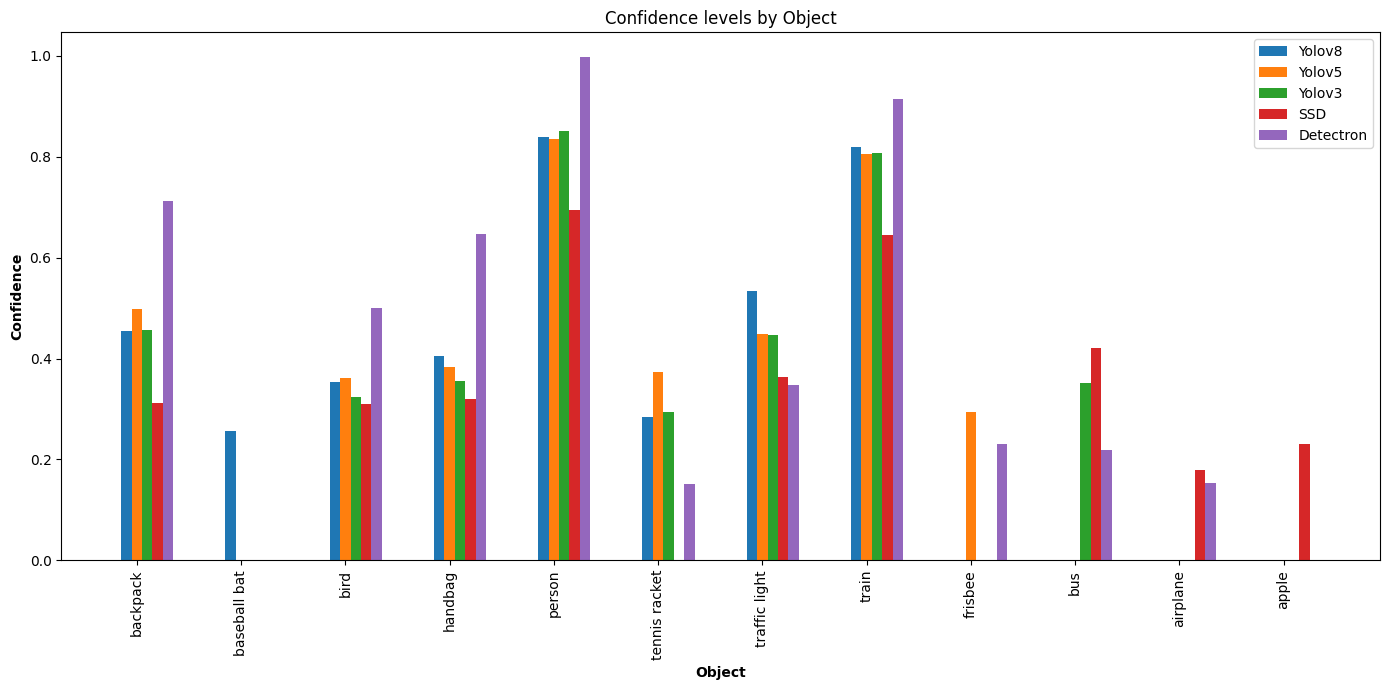

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Set the figure size for better readability
plt.figure(figsize=(14, 7))

# Define the width of the bars
bar_width = 0.10

# Get the positions of the bars on the x-axis
index = np.arange(len(combined_df))

# Plotting the bars for each confidence
plt.bar(index, combined_df['Confidence_1'], width=bar_width, label='Yolov8')
plt.bar(index + bar_width, combined_df['Confidence_2'], width=bar_width, label='Yolov5')
plt.bar(index + 2*bar_width, combined_df['Confidence_3'], width=bar_width, label='Yolov3')
plt.bar(index + 3*bar_width, combined_df['Confidence_4'], width=bar_width, label='SSD')
plt.bar(index + 4*bar_width, combined_df['Confidence_5'], width=bar_width, label='Detectron')

# Add labels to the x-axis for each group of bars
plt.xlabel('Object', fontweight='bold')
plt.xticks(index + bar_width, combined_df['Object'], rotation=90)

# Add labels and title
plt.ylabel('Confidence', fontweight='bold')
plt.title('Confidence levels by Object')


# Create a legend
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()